# Learn with Linear Model

Use a linear model to learn weights for draco. 

In [35]:
from draco.learn import linear
from draco.learn import data_util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
data, _ = data_util.load_data(test_size=0.3)

## Run Model PCA

We see 7 distinct clusters. What do they mean?

Train score:  0.8210161662817552
Dev score:  0.8548387096774194


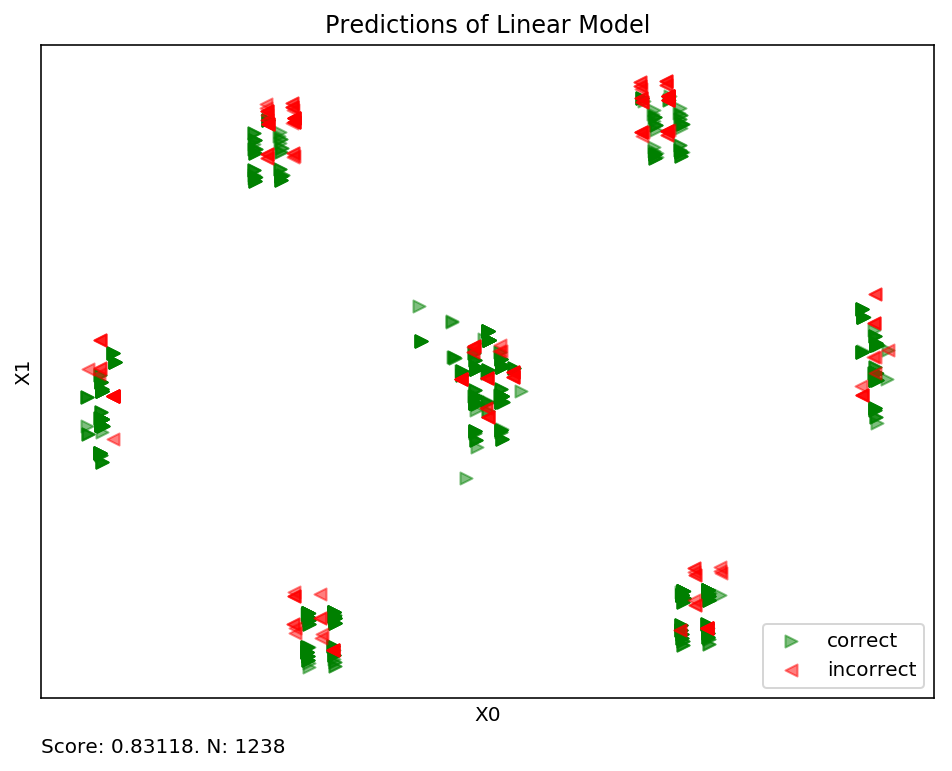

CPU times: user 857 ms, sys: 87.1 ms, total: 945 ms
Wall time: 723 ms


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=False,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [37]:
%time linear.train_and_plot(data)

## Explain Variance

Try to explain the variance using principal components. It we can explain most of the variance with few components, then the clustering we see above should be meaningful. 

Train score:  0.8210161662817552
Dev score:  0.8548387096774194


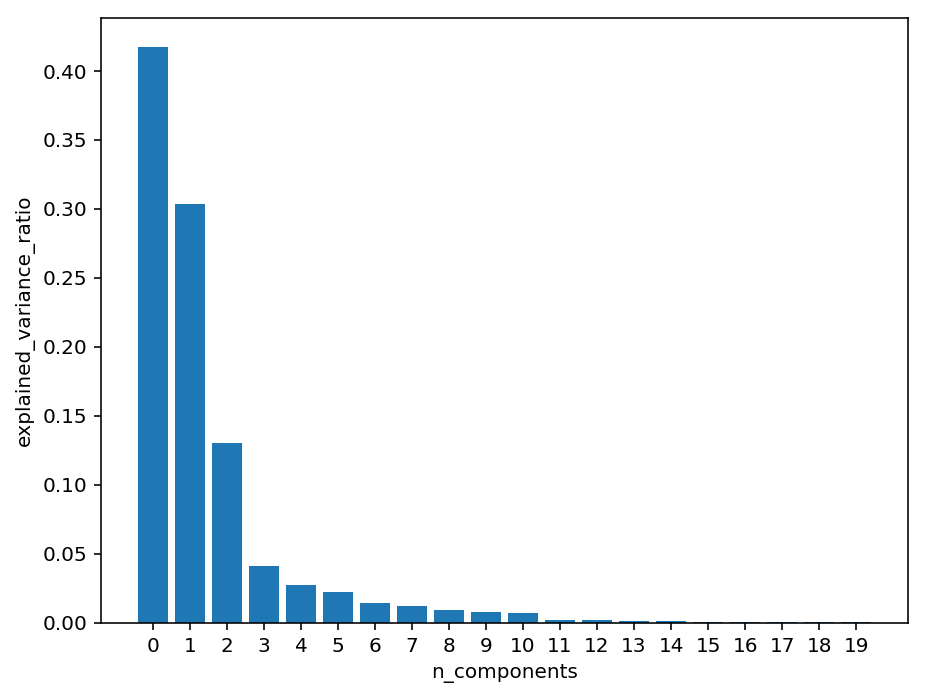

In [47]:
X = data.positive - data.negative

pca = PCA()
X2 = pca.fit_transform(X)

clf = linear.train_model(X, 0.3)

size = 20  # len(X.columns)

x = np.arange(size)

plt.figure(figsize=(8,6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(x=x, height=pca.explained_variance_ratio_[:size])
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.xticks(x)

plt.show()